# Project 4 - Test a Perceptual Phenomenon
## The Science of Decisions

### Backgroung Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.


### 1. What is our independent variable? What is our dependent variable?
The independent variable is the congruency condition - whether the name of the color matches with the ink color.

The dependent variable is the time it takes to name the ink colors in equally-sized lists.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

<u>Hypothesis</u>

We are interested in to know if there is a statistical difference in when the colors are congruent and when they are not. The hypothesis can be stated as below: 

**H<sub>0</sub> :** (Null Hypothesis) There is no statistical difference between the time taken in congruent and incongruent conditions

<p>&mu;<sub>cong</sub> = &mu;<sub>incong</sub></p>


**H<sub>0</sub> :** (Alternate Hypothesis) There is a statistical diffeence between the time taken in congruent and incongruent conditions

<p>&mu;<sub>cong</sub> &ne; &mu;<sub>incong</sub></p> 

<u>Relavent Statitcal tests</u>

As the sample is same before and after we will use a dependent two-tailed test by assuming a normal distribution in both cases. 

We are using dependent two tailed t-test because of the following reasons:

1. We are taking results of same population in two situations (dependent two tail)
2. The number of samples are 24 (<30)  (t-test)
3. We do not know the standard deviation (sigma) of the population (t-test)


### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.





In [5]:
# Import all the libraries needed
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy import stats

%matplotlib inline


# Read the CSV file

stroop_data = pd.read_csv("stroopdata.csv")

# Desribe the dataframe
print stroop_data.describe() 

       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000


The above table describes some of the descriptive statistics of the dataset. We can note that there is an increase in all the values of Incongruent

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots



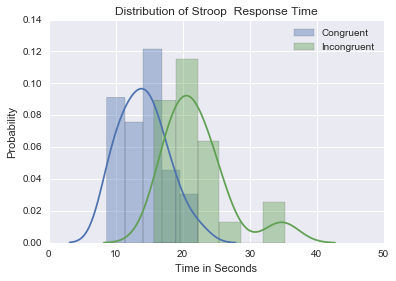

In [2]:

ax = sns.distplot(stroop_data['Congruent'], label = "Congruent")
ax = sns.distplot(stroop_data['Incongruent'], color = sns.xkcd_rgb["muted green"], label = "Incongruent") 

ax.set_title('Distribution of Stroop  Response Time')
ax.set(xlabel='Time in Seconds', ylabel='Probability')
sns.plt.xlim([0,50])
sns.plt.legend()
sns.plt.show()

The above graph shows the Histograms and bell cutve of the congruent and incongruent. The distrubution illustrates that the time for Incongruent Condition is greater than for congruent condition. 

For the Incngrent Condition, there is a kink in the right which might be due to some outliers. 


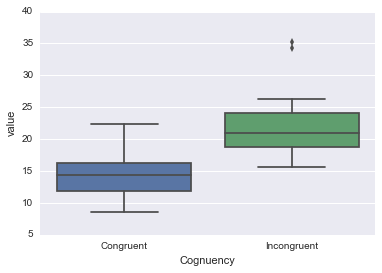

In [3]:
## Clean the data to process
df1 = pd.DataFrame(stroop_data['Congruent']).assign(Cognuency = 'Congruent')
df2 = pd.DataFrame(stroop_data['Incongruent']).assign(Cognuency = 'Incongruent')

cdf = pd.concat([df1, df2])   
mdf = pd.melt(cdf, id_vars=['Cognuency'], var_name=['Number'])

## Box plot

ax = sns.boxplot(x = "Cognuency", y="value", data=mdf)

The above plot shows box plots for both Congruent and Incongruent conditions. It can be seen that there is a significant diffirence between the median times of the two conditions. The spread of time is also different, with Congruent condition having a greater spread. 

The plot also confirms the presence of outliers

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Now we perform the dependent t-tests

In [4]:
# Critical Values

t_crit = stats.t.ppf(q= 1-0.025, df =len(stroop_data) - 1)
#print t_crit
print "The Critical t-value is +/- %f " % t_crit

# T statistics 
paired_sample = stats.ttest_rel(stroop_data['Congruent'], stroop_data['Incongruent'])

t = paired_sample[0]
p = paired_sample[1]
print "The t-statistic is " + str(t) + "  and the p-value is  " + str(p) 


resut = abs(t_crit) > abs(t)

# 95% CI 
mean_cong = stroop_data['Congruent'].mean()
mean_incog = stroop_data['Incongruent'].mean()
diff_of_mean = mean_cong - mean_incog


diff_data = stroop_data['Congruent'] - stroop_data['Incongruent']
n = len(stroop_data)


print "Cohen's D test : " +str (diff_of_mean/diff_data.std())
CI_low = diff_of_mean - t_crit * (diff_data.std() / np.sqrt(n) )

CI_high = diff_of_mean + t_crit * (diff_data.std() / np.sqrt(n) )


print "The 95% confidence interval is (" + str(CI_low) + " , " + str(CI_high) + " )"


if resut:
    print "We ACCEPT the NULL Hypothesis"
else:
    print "We REJECT the NULL Hypothesis"
        

The Critical t-value is +/- 2.068658 
The t-statistic is -8.02070694411  and the p-value is  4.10300058571e-08
Cohen's D test : -1.63721994912
The 95% confidence interval is (-10.0190279094 , -5.91055542397 )
We REJECT the NULL Hypothesis


The dependent two tailed t-test for alpha value of 0.025 performed and it gave you the following results:

**tcritical = +/- 2.067**

**t-value = -8.021**

**p-value = 4.10e-08**

**95% Confidence Interval = (-10.0193, -5.9102)**

From the above statistics we can **REJECT** the null hypothesis and **Accept** the alternative hypothesis. We can say that There is a statistical diffeence between the time taken in congruent and incongruent conditions 

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

While doing the experiment I felt there was a difference in the time taken between the 2. This is because of how the brains cognative function works. 
An example of similar effect is below:

 **<td>Y0V (@n Re@d tis  (@v$e 0F (ognItIve fVn(Ti0Ns </td>**